In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nets import WeakRM

import warnings
warnings.filterwarnings('ignore')

In [2]:
project_dir = ''
data_dir = project_dir + 'data/m7G/data_for_mil/base_data/'
checkpoint_filepath = project_dir + ''

test_data = np.load(data_dir + 'int_base.npy', allow_pickle=True).astype(np.float32)
instance_len = test_data.shape[2]

test_data.shape

(819, 55, 50, 4)

In [3]:
model = WeakRM()
model(test_data[0].reshape(1, -1, 50, 4))
model.load_weights(checkpoint_filepath)

In [4]:
predictions = []
weights = []
for i in np.arange(test_data.shape[0]):
    y_pred, a_weights = model(test_data[i].reshape(1, -1, 50, 4), training=False)
    predictions.append(y_pred)
    weights.append(a_weights)
predictions = np.concatenate(predictions, axis=0)
weights = np.concatenate(weights, axis=0)

In [5]:
ind = [i[0] for i in sorted(enumerate(predictions), key=lambda x:x[1],reverse=True) if
       predictions[i[0]] > 0.5]

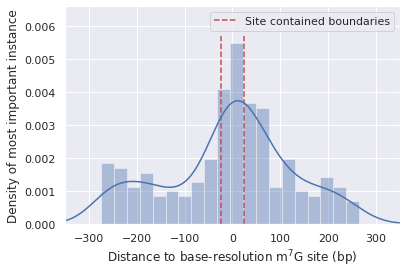

In [6]:
sns.set(style='darkgrid')
best_weights = np.argmax(weights[ind], axis=1)
ax = sns.distplot(-300 + best_weights*10 + 25, bins=20, kde=True)
ax.vlines(x=-25, ymin=0, ymax=0.0057, color='r', linestyles='dashed', label='Site contained boundaries')
ax.vlines(x=25, ymin=0, ymax=0.0057, color='r', linestyles='dashed')
ax.legend()
ax.set_xlim(-350, 350)
ax.set_ylim(0, 0.0066)
ax.set_xlabel('Distance to base-resolution m$^7$G site (bp)')
ax.set_ylabel('Density of most important instance')
#ax.set_title('Density plot for predicted site location in true positive bags')
plt.savefig('./dist_base_hm7g.pdf', bbox_inches='tight', dpi=350)